In [13]:
import numpy as np

In [14]:
import pandas as pd

In [15]:
import matplotlib.pyplot as plt

In [16]:
import yfinance as yf

In [17]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [18]:
stock = 'GOOG'
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [19]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512


In [20]:
google_data.shape

(5015, 6)

In [21]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5.015000e+03
mean,45.124797,45.601251,44.676144,45.149349,45.099277,1.158432e+08
std,43.174418,43.653344,42.758040,43.217309,43.172189,1.498416e+08
min,2.470490,2.534002,2.390042,2.490913,2.488082,1.584340e+05
25%,13.027295,13.141492,12.877855,13.023435,13.008632,2.735746e+07
50%,26.977432,27.187000,26.778875,26.989000,26.958323,5.629020e+07
75%,60.136002,60.596375,59.710251,60.250750,60.182264,1.425764e+08
max,191.750000,193.309998,190.619995,192.660004,192.660004,1.650833e+09


In [22]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5015 entries, 2004-08-19 to 2024-07-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5015 non-null   float64
 1   High       5015 non-null   float64
 2   Low        5015 non-null   float64
 3   Close      5015 non-null   float64
 4   Adj Close  5015 non-null   float64
 5   Volume     5015 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 274.3 KB


In [23]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [24]:
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

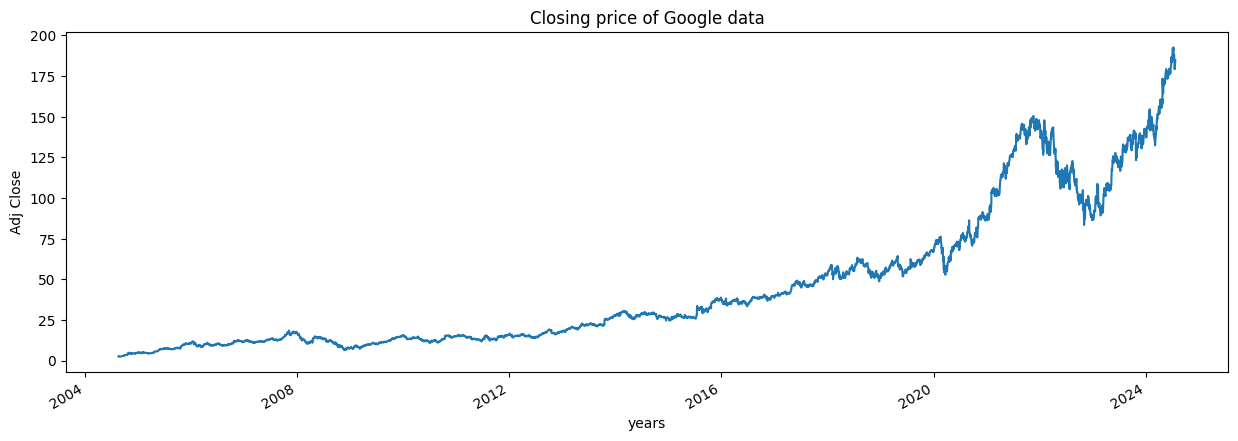

In [25]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [26]:
def plot_graph(figsize, values, column_name ):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [27]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

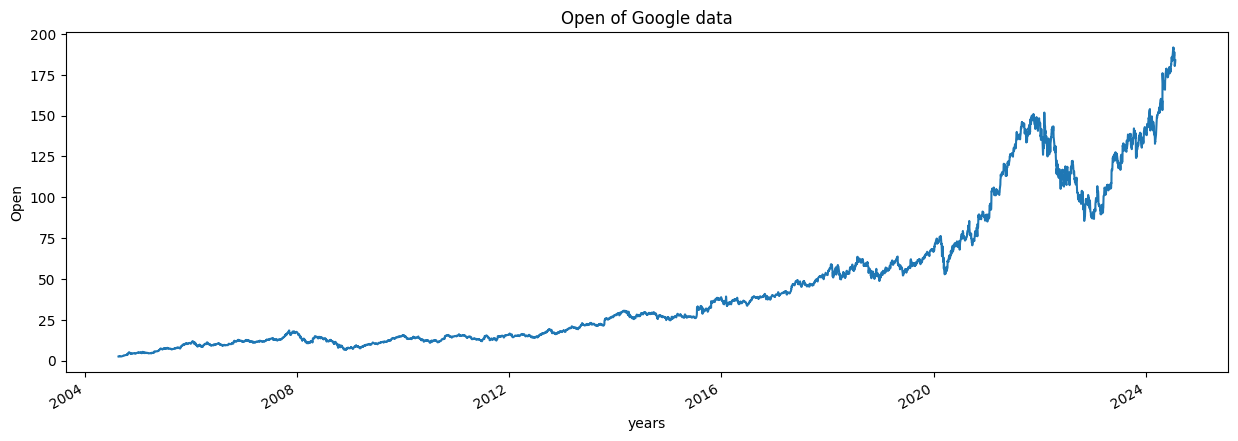

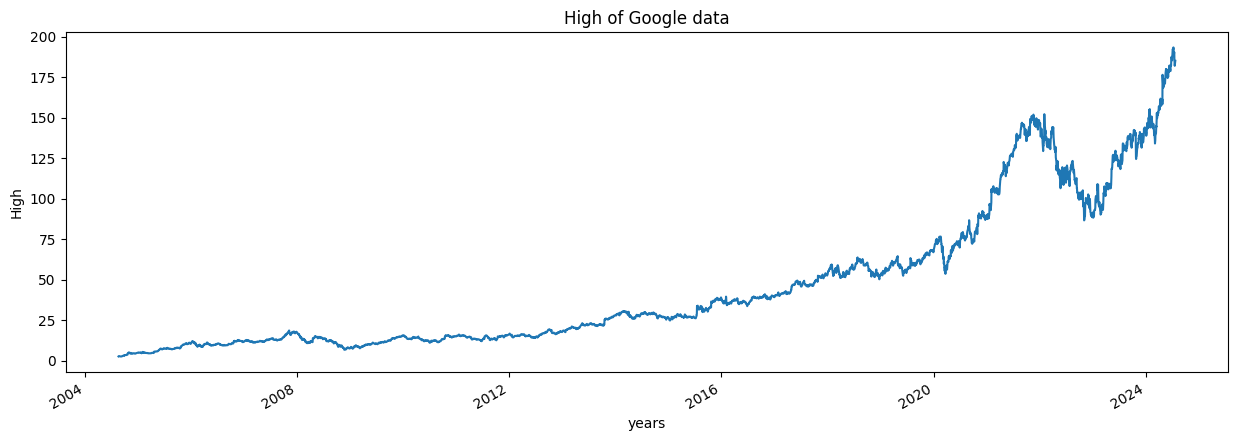

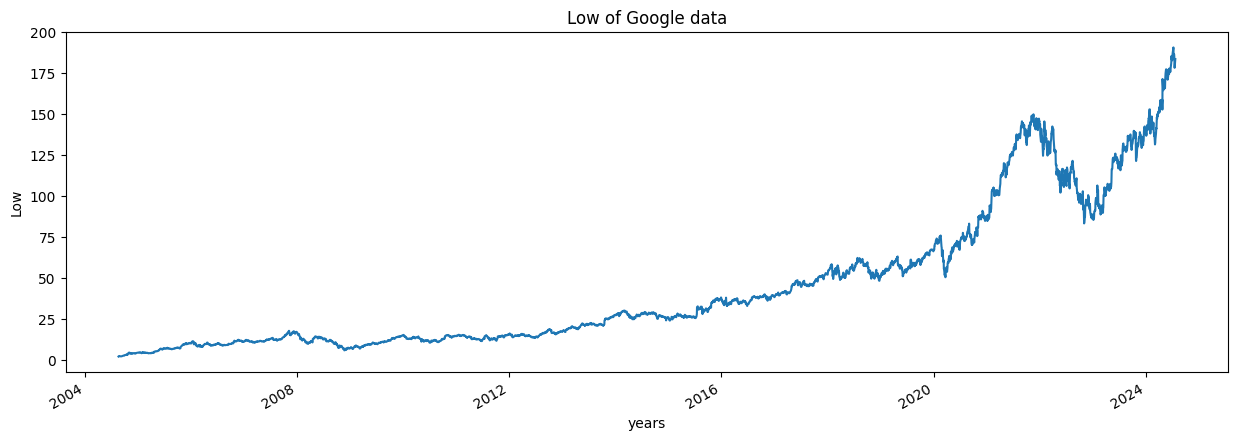

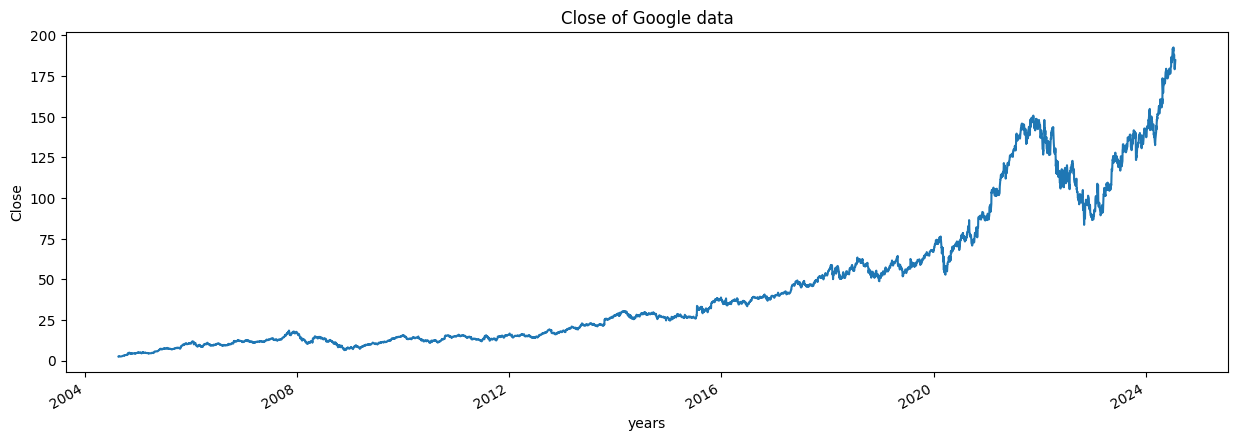

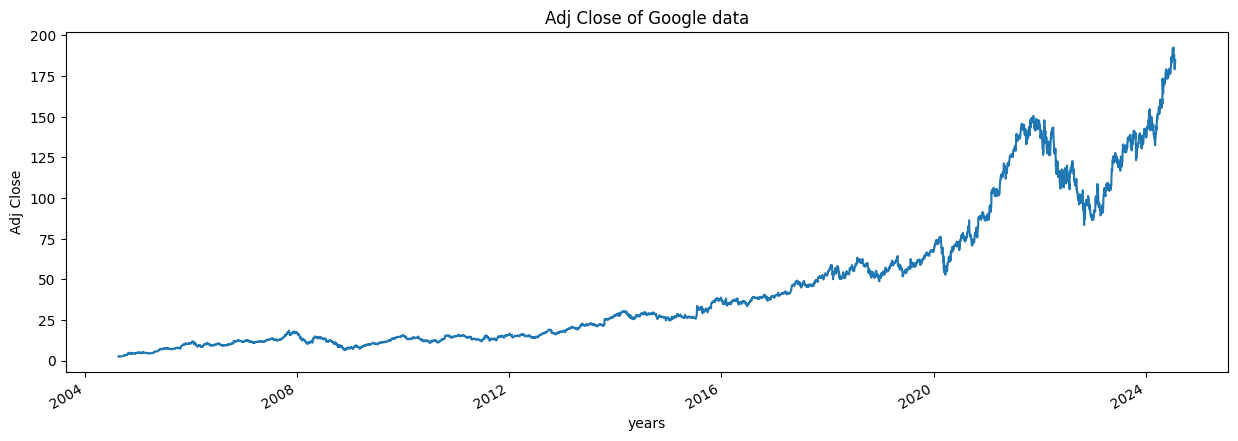

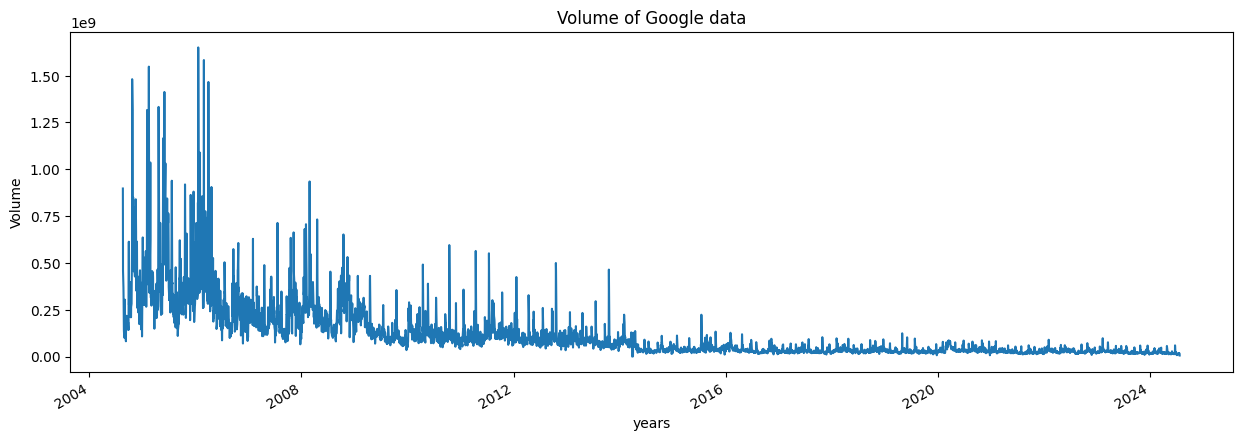

In [28]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [29]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [30]:
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [31]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [32]:
for i in range(2004,2025):
    print(i, list(google_data.index.year).count(i))

2004 94
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 140


In [33]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [34]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-08-09         NaN
2005-08-10         NaN
2005-08-11         NaN
2005-08-12         NaN
2005-08-15    5.028317
Name: MA_for_250_days, dtype: float64

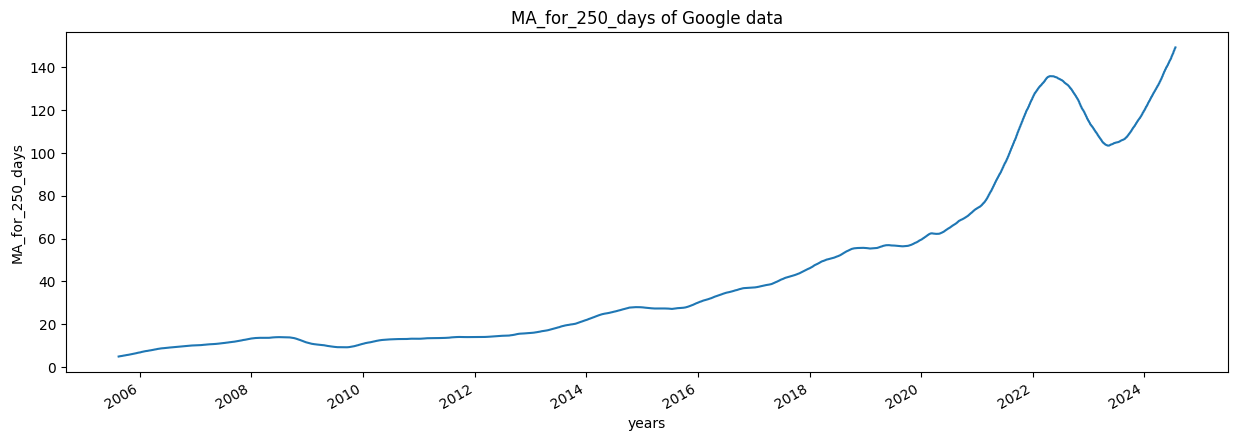

In [35]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

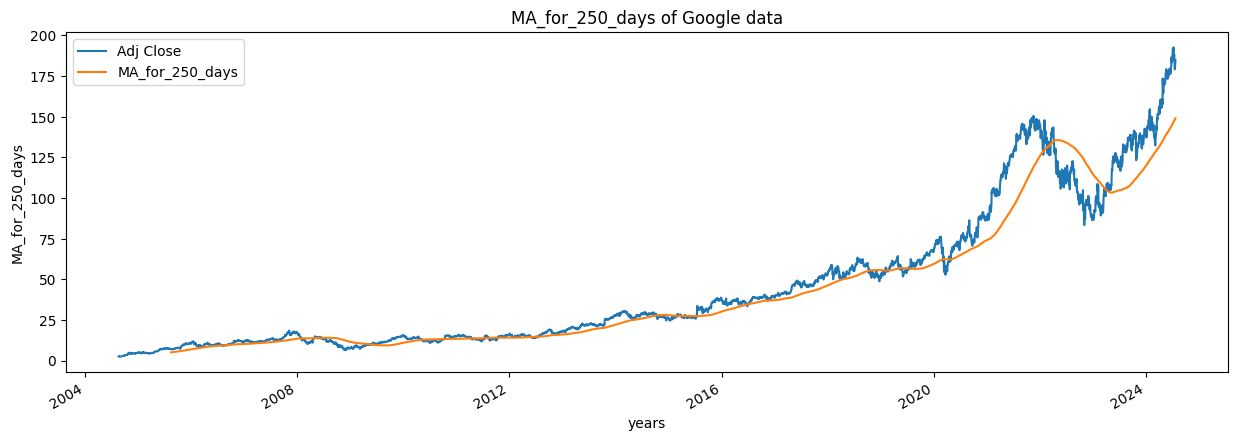

In [36]:
plot_graph((15,5), google_data[['Adj Close', 'MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

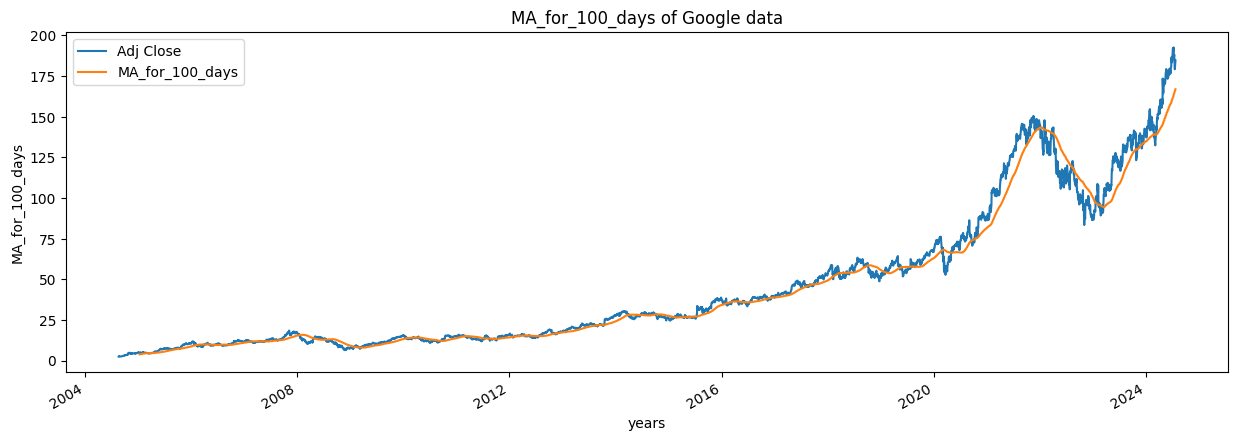

In [37]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close', 'MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

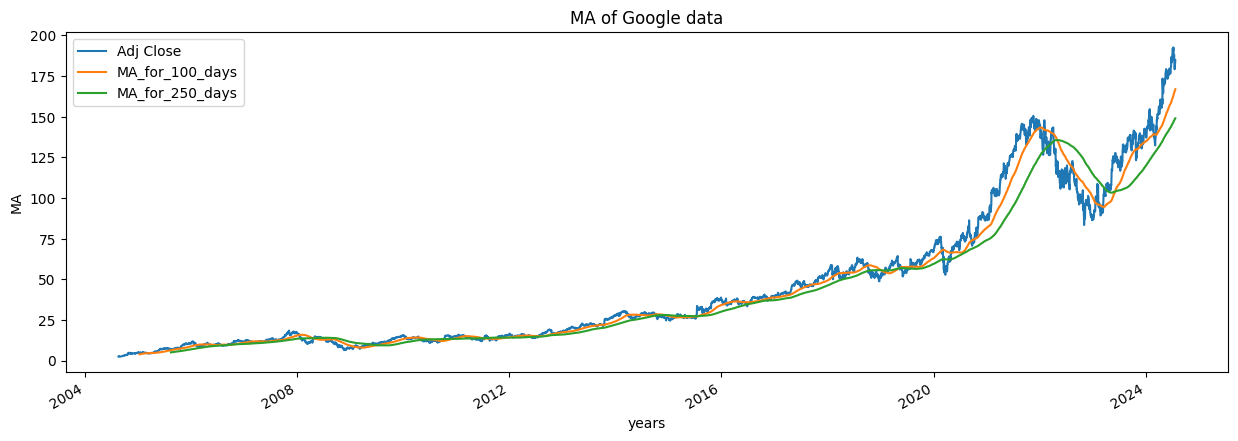

In [38]:
plot_graph((15,5), google_data[['Adj Close', 'MA_for_100_days', 'MA_for_250_days']], 'MA')

In [39]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-08-19,2.496292,NaN
2004-08-20,2.694573,0.079430
2004-08-23,2.721690,0.010064
2004-08-24,2.608991,-0.041408
2004-08-25,2.637103,0.010775


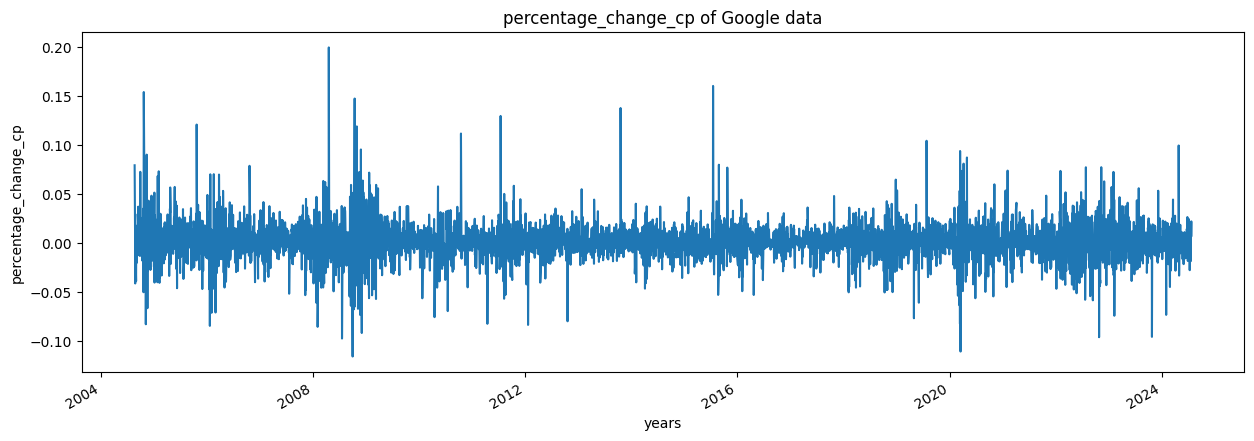

In [40]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change_cp')

In [41]:
Adj_close_price = google_data[['Adj Close']]

In [42]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([192.66000366]), array([2.48808169]))

In [43]:
from sklearn.preprocessing import MinMaxScaler 

In [44]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[4.31749279e-05],
       [1.08581220e-03],
       [1.22840556e-03],
       ...,
       [9.30221012e-01],
       [9.51044311e-01],
       [9.58248293e-01]])

In [45]:
len(scaled_data)

5015

In [46]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [47]:
x_data[0],y_data[0]

(array([[4.31749279e-05],
        [1.08581220e-03],
        [1.22840556e-03],
        [6.35788989e-04],
        [7.83614035e-04],
        [1.03348276e-03],
        [8.03236951e-04],
        [2.61643473e-04],
        [3.08737468e-04],
        [3.13989218e-05],
        [1.96230411e-04],
        [0.00000000e+00],
        [2.05389945e-04],
        [2.99582949e-04],
        [3.00889305e-04],
        [6.95966599e-04],
        [9.79844446e-04],
        [1.50182002e-03],
        [1.56853693e-03],
        [1.82625131e-03],
        [2.28674167e-03],
        [2.53137368e-03],
        [2.33252680e-03],
        [2.40316654e-03],
        [2.72237366e-03],
        [2.59285890e-03],
        [2.38747397e-03],
        [3.51252574e-03],
        [4.06458761e-03],
        [3.87097242e-03],
        [4.26081802e-03],
        [4.58524931e-03],
        [5.01826483e-03],
        [4.84950926e-03],
        [5.08105766e-03],
        [4.93454147e-03],
        [4.61141654e-03],
        [4.89137156e-03],
        [5.3

In [48]:
int(len(x_data)*0.7)

3440

In [49]:
4990-100-int(len(x_data)*0.7)

1450

In [50]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [51]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3440, 100, 1)
(3440, 1)
(1475, 100, 1)
(1475, 1)


In [52]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [53]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\incha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [56]:
model.fit(x_train,y_train, batch_size=32, epochs = 4)

Epoch 1/4
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - loss: 1.9626e-04
Epoch 2/4
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 1.7039e-05
Epoch 3/4
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 1.8244e-05
Epoch 4/4
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 137ms/step - loss: 1.8361e-05


In [57]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [58]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step


In [59]:
predictions

array([[0.3014556 ],
       [0.29989183],
       [0.29833594],
       ...,
       [0.9373892 ],
       [0.932718  ],
       [0.92890704]], dtype=float32)

In [60]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 59.81647],
       [ 59.51909],
       [ 59.2232 ],
       ...,
       [180.75319],
       [179.86485],
       [179.14012]], dtype=float32)

In [61]:
y_test

array([[0.29611629],
       [0.29229778],
       [0.29558316],
       ...,
       [0.93022101],
       [0.95104431],
       [0.95824829]])

In [62]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_train = scaler.inverse_transform(y_train)
inv_y_test

array([[ 58.80108643],
       [ 58.07491302],
       [ 58.6996994 ],
       ...,
       [179.38999939],
       [183.3500061 ],
       [184.72000122]])

In [63]:
rmse = np.sqrt(np.mean((inv_predictions-inv_y_test)**2))

In [64]:
rmse

4.354914608346911

In [65]:
plotting_data = pd.DataFrame(
    {
        'Original_test_data': inv_y_test.reshape(-1),
        'predictions': inv_predictions.reshape(-1),
    } ,
        index = google_data.index[splitting_len+100:]
)
plotting_data.head()

,Original_test_data,predictions
Date,,
2018-09-11,58.801086,59.816471
2018-09-12,58.074913,59.519089
2018-09-13,58.699699,59.223202
2018-09-14,58.559860,58.981899
2018-09-17,57.736801,58.783588


<Figure size 640x480 with 0 Axes>

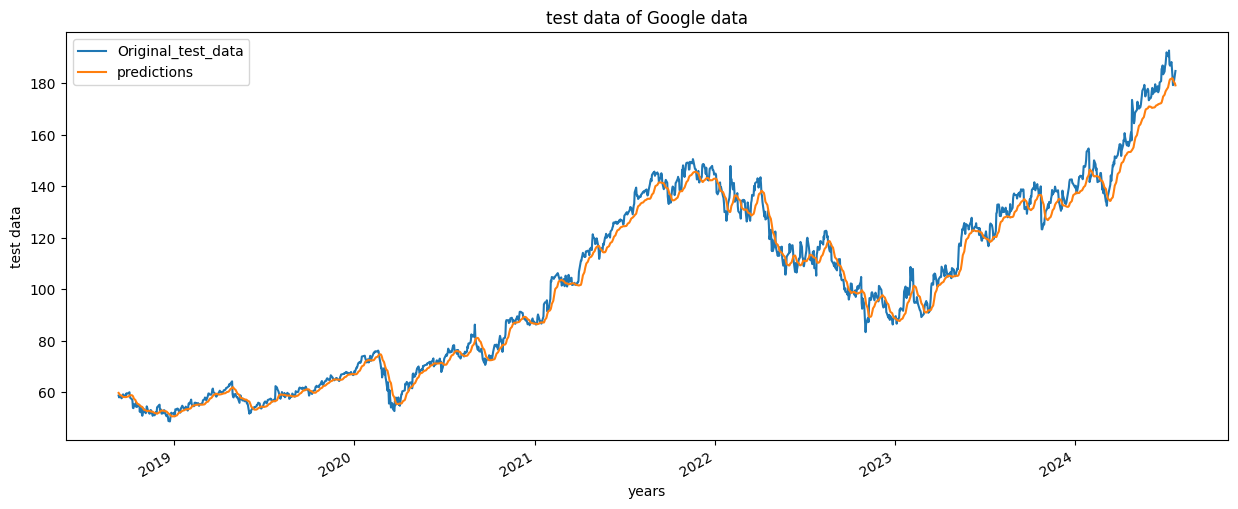

In [66]:
plot_graph((15,6), plotting_data, 'test data')

<Figure size 640x480 with 0 Axes>

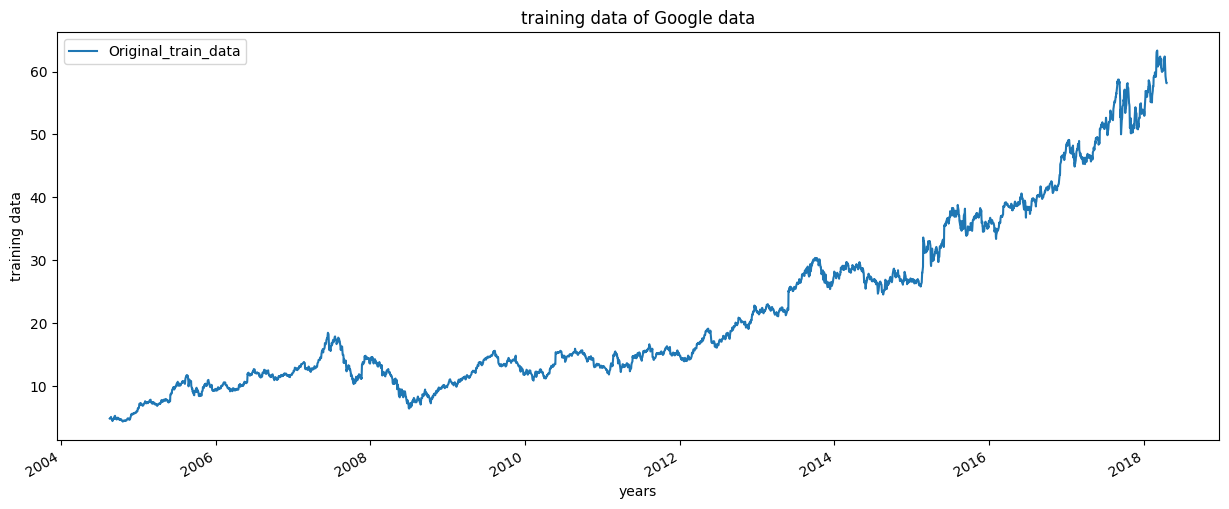

In [67]:
training_data = pd.DataFrame(
    {
        'Original_train_data': inv_y_train.reshape(-1)
    } ,
        index = google_data.index[:splitting_len]
)
plotting_data.head()


plot_graph((15,6), training_data, 'training data')

<Figure size 640x480 with 0 Axes>

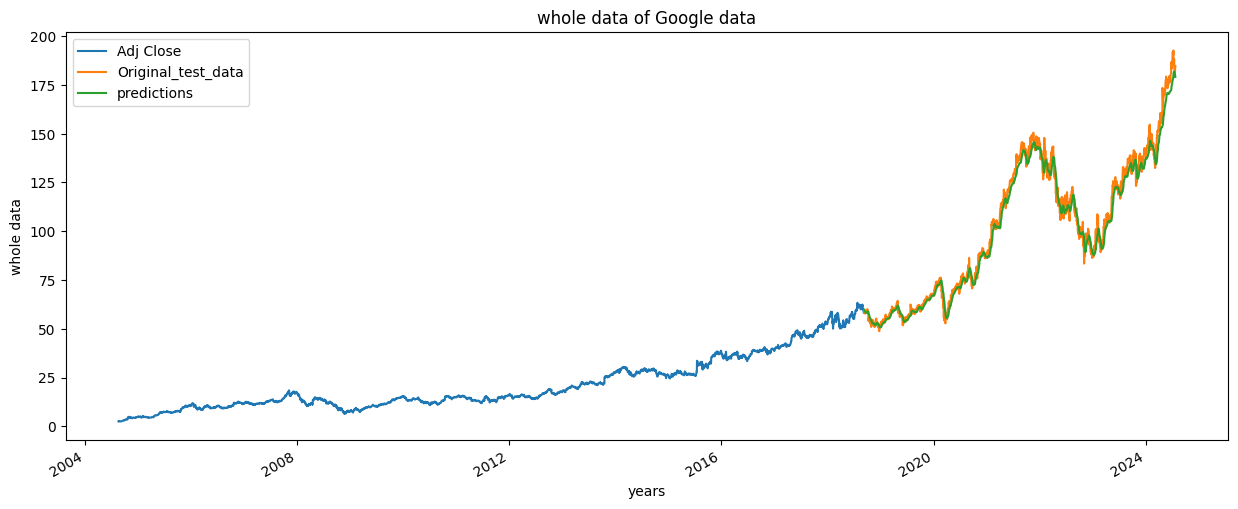

In [68]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100], plotting_data], axis=0), 'whole data')

In [69]:
import time
import yfinance as yf
import numpy as np
from datetime import timedelta

def online_learning(model, new_data, scaler):
    start_time = time.time()
    
    # Prepare the new data
    scaled_new_data = scaler.transform(new_data)
    x_new = scaled_new_data[:-1].reshape(1, -1, 1)
    y_new = scaled_new_data[-1].reshape(1, 1)
    
    # Make a prediction
    prediction_start = time.time()
    prediction = model.predict(x_new)
    prediction_duration = time.time() - prediction_start
    
    # Update the model
    model_start = time.time()
    model.fit(x_new, y_new, epochs=1, verbose=0)
    model_duration = time.time() - model_start
    
    total_duration = time.time() - start_time
    
    print(f"Prediction time: {prediction_duration:.2f} seconds")
    print(f"Model training time: {model_duration:.2f} seconds")
    print(f"Total online learning time: {total_duration:.2f} seconds")
    
    return scaler.inverse_transform(prediction)[0][0]

def update_data_and_model(stock, model, scaler, last_100_days):
    start_time = time.time()
    
    # Fetch the latest data
    fetch_start = time.time()
    end = datetime.now()
    start = end - timedelta(days=1)
    new_data = yf.download(stock, start, end)
    fetch_duration = time.time() - fetch_start
    
    if not new_data.empty:
        new_close = new_data['Adj Close'].values[-1]
        last_100_days = np.append(last_100_days[1:], new_close)
        
        # Perform online learning
        prediction = online_learning(model, last_100_days.reshape(-1, 1), scaler)
        
        print(f"New data point: {new_close}")
        print(f"Predicted next price: {prediction}")
    
    total_duration = time.time() - start_time
    
    print(f"Data fetching time: {fetch_duration:.2f} seconds")
    print(f"Total update time: {total_duration:.2f} seconds")

    return last_100_days


In [70]:
last_100 = google_data[['Adj Close']].tail(100) 
last_100.tail()

,Adj Close
Date,
2024-07-17,182.619995
2024-07-18,179.220001
2024-07-19,179.389999
2024-07-22,183.350006
2024-07-23,184.720001


In [71]:
last_100 = scaler.fit_transform(last_100['Adj Close'].values.reshape(-1,1)).reshape(1,-1,1)
last_100


array([[[0.11969643],
        [0.0915132 ],
        [0.0271887 ],
        [0.02022571],
        [0.        ],
        [0.04443055],
        [0.06183753],
        [0.10577069],
        [0.11704384],
        [0.13610938],
        [0.19529432],
        [0.15931894],
        [0.26392896],
        [0.25464514],
        [0.28382316],
        [0.26823962],
        [0.31847224],
        [0.30819364],
        [0.31731183],
        [0.32129072],
        [0.32659565],
        [0.39688836],
        [0.38644387],
        [0.39473316],
        [0.32129072],
        [0.35444763],
        [0.39092015],
        [0.42407706],
        [0.41611953],
        [0.46800971],
        [0.44148454],
        [0.39407013],
        [0.38859907],
        [0.40318833],
        [0.41280366],
        [0.38395716],
        [0.42092707],
        [0.45358658],
        [0.47314927],
        [0.42092707],
        [0.68187193],
        [0.5858827 ],
        [0.53183707],
        [0.54725498],
        [0.59516678],
        [0

In [72]:
last_100.shape

(1, 100, 1)

In [73]:
day_101 = model.predict(last_100)
day_101

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0.84606946]], dtype=float32)

In [74]:
scaler.inverse_transform(day_101)

array([[183.38559]], dtype=float32)

In [75]:
import numpy as np


def predict_future_stock(no_of_days, prev_100):
    future_predictions = []
    prev_100 = scaler.fit_transform(prev_100['Adj Close'].values.reshape(-1,1)).reshape(1,-1,1)
    for _ in range(no_of_days):
        next_day = model.predict(prev_100)[0, 0]  
        future_predictions.append(next_day)
        prev_100 = np.append(prev_100[:, 1:, :], [[[next_day]]], axis=1)  
    return scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

In [76]:
no_of_days = 10  
future_results = predict_future_stock(no_of_days, prev_100= google_data[['Adj Close']].tail(100))
print(future_results)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[183.38559 182.9722  182.63406 182.34628 182.09166 181.85873 181.6401
 181.43108 181.22873 181.03123]


Text(0.5, 1.0, 'Future Close price of Google stock')

<Figure size 640x480 with 0 Axes>

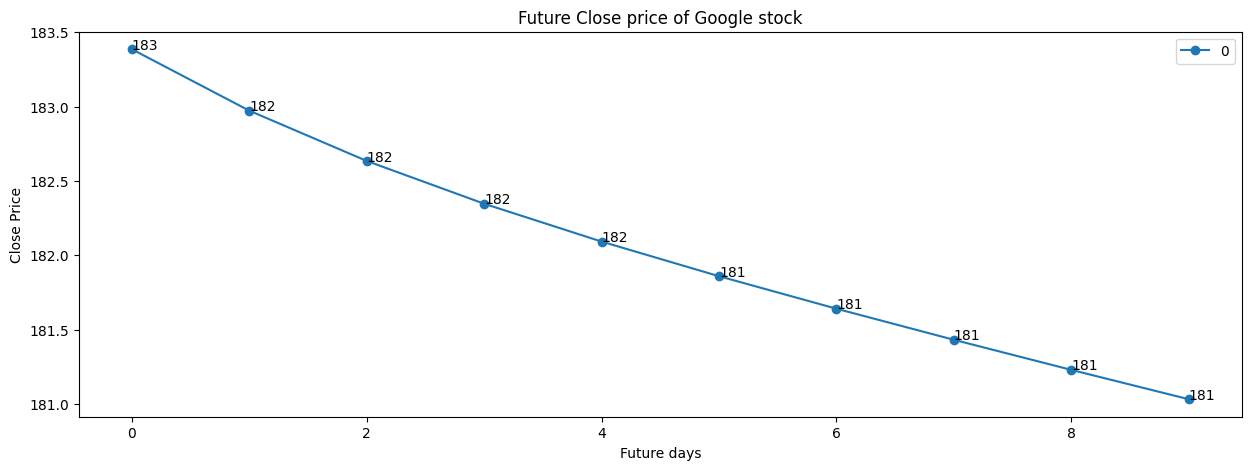

In [78]:
future_results = np.array(future_results).reshape(-1,1)
plt.figure()
pd.DataFrame(future_results).plot(figsize=(15,5), marker='o')
for i in range(len(future_results)):
    plt.text(i, future_results[i], int(future_results[i][0]))
plt.xlabel('Future days')
plt.ylabel('Close Price')
plt.title("Future Close price of Google stock")

In [ ]:
model.save("Latest_stcok_price_model.keras")